In [30]:
import pandas as pd 
df_arfima = pd.read_csv('./data/arfima.txt',index_col=0)
df_arfima.reset_index(drop=True)
df_arfima = df_arfima.T.reset_index(drop=True)

In [31]:
columns = ["pred_"+str(i) for i in range(1,31)]+['Date']
df_arfima.columns = columns 


In [32]:
df_arfima

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,...,pred_22,pred_23,pred_24,pred_25,pred_26,pred_27,pred_28,pred_29,pred_30,Date
0,3.03043563999047,3.00715856444222,2.98439197391323,2.9629199058112,2.9426887976662,2.92371323322738,2.905964784473,2.88940080005756,2.87396856412812,2.85961012374946,...,2.75031190473258,2.74497356028108,2.74003347577134,2.7354619884417,2.73123154178438,2.72731655777728,2.72369331229174,2.72033981476491,2.71723569285771,2018-10-15
1,2.8663129456427,2.83981686798254,2.82303776824044,2.80759137064101,2.79424051422974,2.78237553934964,2.7718141793335,2.76237476872266,2.75392273013819,2.74634454384435,...,2.69768053706755,2.69574299434911,2.69399100598723,2.69240555954018,2.69096963836239,2.68966801200327,2.68848704832555,2.6874145451095,2.6864395791579,2018-10-16
2,2.8352010239589,2.81939350266054,2.80531528860662,2.79287238605521,2.78172933454736,2.77171047965082,2.76267727368283,2.75452005230427,2.74714668052899,2.74047767654268,...,2.69598130940246,2.6941301548593,2.69244968711978,2.6909236067825,2.68953718477335,2.68827711213998,2.68713136395578,2.68608907602381,2.68514043320284,2018-10-17
3,2.97271550666377,2.94879280219389,2.92679379279485,2.90656424009111,2.88796198952113,2.87085621846336,2.85512658523703,2.84066240809789,2.82736189782836,2.81513144718079,...,2.72643575345379,2.72232527283707,2.71854550276911,2.71506983570429,2.71187380478082,2.70893491160416,2.7062324678831,2.70374744980466,2.70146236412349,2018-10-18
4,2.97104602763898,2.95094037521165,2.93099185691434,2.91190287125093,2.89390423997124,2.87708826133212,2.86146691093787,2.84701215954893,2.83367420724715,2.82139203457978,...,2.73348755715938,2.72952585730517,2.72589493597482,2.72256608436841,2.71951302621303,2.71671173347364,2.71414025082494,2.71177852983369,2.70960827331954,2018-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2.80788953577473,2.80817230009421,2.80844162062582,2.80869785391185,2.80894152103866,2.80917318095702,2.80939339296411,2.80960270287245,2.80980163740053,2.80999070193192,...,2.81164483501305,2.81174224272477,2.81183480073591,2.81192275013488,2.81200632006776,2.81208572832279,2.81216118188763,2.81223287748041,2.8123010020554,2019-01-31
74,2.78287153951863,2.78436544481683,2.78578549295422,2.78713512947743,2.78841775298262,2.78963664128253,2.79079493202767,2.79189561906362,2.79294155447089,2.79393545289773,...,2.80262772554505,2.80313950552046,2.80362580591935,2.80408789488195,2.80452697747919,2.80494419884162,2.80534064713469,2.80571735638743,2.80607530918152,2019-02-01
75,2.75838805155737,2.76106774789901,2.76361503413066,2.76603626637878,2.76833759641622,2.7705249147553,2.77260384108558,2.77457972812433,2.77645767014961,2.77824251326473,...,2.7938699599594,2.79479136343531,2.79566706971315,2.7964993447419,2.79729034216223,2.7980421088646,2.79875659027382,2.79943563537327,2.80008100148121,2019-02-04
76,2.74864858722358,2.75178879901682,2.75477423509355,2.75761239313961,2.7603104740495,2.7628753541887,2.76531358616711,2.76763140799786,2.76983475514171,2.77192927349385,...,2.79028918605451,2.79137320437336,2.79240366320851,2.7933832084466,2.794314355314,2.79519949482146,2.79604089989216,2.79684073118862,2.79760104265304,2019-02-05


In [33]:
import numpy as np 
def prepare_data(path):
    df = pd.read_csv(path)
    df.columns = ['Date_vix']
    df['Date'] = df['Date_vix'].apply(lambda x: x[0:8])
    df['vix'] = df['Date_vix'].apply(lambda x: x[9:])
    df['vix'] = df['vix'].apply(lambda x: str.replace(x, ' ', ''))
    df['vix'] = df['vix'].apply(lambda x: 0.0 if x == '.' else x)
    df['vix'] = df['vix'].astype(float)
    df['log_vix'] = np.log(df['vix'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.drop_duplicates()
    return df
df = prepare_data('./data/VIXdata.txt')

c:\Users\gaoxc\anaconda3\envs\papers\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
df 

,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.400864
2,20010103 26.60,2001-01-03,26.60,3.280911
4,20010104 26.97,2001-01-04,26.97,3.294725
6,20010105 28.67,2001-01-05,28.67,3.355851
8,20010108 29.84,2001-01-08,29.84,3.395850
...,...,...,...,...
6185,20220725 23.36,2022-07-25,23.36,3.151025
6186,20220726 24.69,2022-07-26,24.69,3.206398
6187,20220727 23.24,2022-07-27,23.24,3.145875
6188,20220728 22.33,2022-07-28,22.33,3.105931


In [35]:
df['Date'] = df['Date'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 6189
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date_vix  5436 non-null   object 
 1   Date      5436 non-null   object 
 2   vix       5436 non-null   float64
 3   log_vix   5436 non-null   float64
dtypes: float64(2), object(2)
memory usage: 212.3+ KB


In [36]:
df_arfima_true = pd.merge(df_arfima[['pred_1','pred_2','Date']],df[['Date','log_vix']],how='left',on=['Date'])


In [37]:
df_arfima_true['log_vix_true'] = df_arfima_true['log_vix'].shift(-1)
df_arfima_true.dropna(inplace=True)
df_arfima_true


,pred_1,pred_2,Date,log_vix,log_vix_true
0,3.03043563999047,3.00715856444222,2018-10-15,3.058707,2.869035
1,2.8663129456427,2.83981686798254,2018-10-16,2.869035,2.856470
2,2.8352010239589,2.81939350266054,2018-10-17,2.856470,2.998728
3,2.97271550666377,2.94879280219389,2018-10-18,2.998728,2.990217
4,2.97104602763898,2.95094037521165,2018-10-19,2.990217,2.977568
...,...,...,...,...,...
72,2.8683901090139,2.8656255767986,2019-01-30,2.871302,2.807594
73,2.80788953577473,2.80817230009421,2019-01-31,2.807594,2.781301
74,2.78287153951863,2.78436544481683,2019-02-01,2.781301,2.755570
75,2.75838805155737,2.76106774789901,2019-02-04,2.755570,2.745346


In [38]:
df_arfima_true = df_arfima_true[(df_arfima_true['Date']>='2018-10-15')&(df_arfima_true['Date']<='2019-01-09')]

# 2020-01-14~~~2020-04-07

In [39]:
def hmse(y_true,y_pred):
    ratio = y_pred/y_true
    return np.mean(np.power((ratio[abs(ratio)<200]-1),2))

def hmae(y_true,y_pred):
    ratio = y_pred/y_true
    return np.mean(abs(ratio[abs(ratio)<200]-1))

def mse(y_true,y_pred):
    return np.mean(np.power(np.abs(y_true-y_pred),2))

def mae(y_true,y_pred):
    return np.mean(np.abs(y_true-y_pred))

In [40]:
df_arfima_true['pred_1'] = df_arfima_true['pred_1'].astype(float)
hmse(df_arfima_true['log_vix_true'],df_arfima_true['pred_1'])

C:\Users\gaoxc\AppData\Local\Temp\ipykernel_16716\881835220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arfima_true['pred_1'] = df_arfima_true['pred_1'].astype(float)


0.0008836511777113183

In [41]:
hmae(df_arfima_true['log_vix_true'],df_arfima_true['pred_1'])

0.022316214337634463

In [42]:
mae(df_arfima_true['log_vix_true'],df_arfima_true['pred_1'])

0.06899118009097709

In [43]:
mse(df_arfima_true['log_vix_true'],df_arfima_true['pred_1'])

0.008511877082478912

In [44]:
from sklearn.metrics import r2_score
r2_score(df_arfima_true['log_vix_true'],df_arfima_true['pred_1'])

0.677650026644905

<AxesSubplot: >

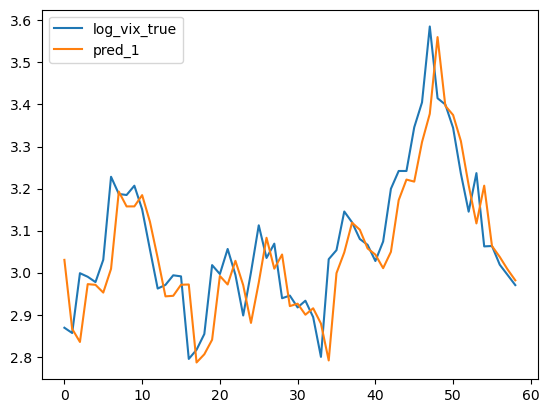

In [45]:
df_arfima_true[['log_vix_true','pred_1']].plot()

In [46]:
df_arfima_true.to_csv('./data/df_arfima_true18_1015-190109_150.txt')

In [66]:
5<<1

10

In [67]:
bin(5)

'0b101'

In [70]:
(10&5)

0

In [71]:
bin(10)

'0b1010'

In [72]:
4&5

4

In [73]:
4&1

0

In [106]:
matrix = [[1,2,3],[4,5,6]]

list(zip(*matrix))[::-1]

[(3, 6), (2, 5), (1, 4)]

[(4, 1), (5, 2), (6, 3)]